In [1]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import math
from astropy import table
from astropy.table import Table, join, unique
from astropy.io import ascii
import astropy.io.fits as pyfits
from astropy.wcs import WCS
import os


In [2]:
# import SNeCO data
SNe_Gal_File = '../Data/3.SNe+GalData.csv'
SNe_Gal_Data = Table.read(SNe_Gal_File, format='csv') 

intenFile = '../Data/3.IntenData.csv'
intenData = Table.read(intenFile, format='csv')

database  = join(SNe_Gal_Data, intenData, keys=('SN_name', "galaxy"))

database[0:1]

SNe      = SNe_Gal_Data["SN_name"]
SNeCheck = database["SN_name"]
SNRs     = database["pc150SNR"]

# for i in range(len(database)):
#     print(SNe[i], SNeCheck[i], SNRs[i])
    
# print(database["SN_name"][0:3],database["pc150SNR"][0:3])

In [3]:
# File location: /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc7793/ngc7793_7m+tp_co21_150pc_broad_mom0.fits

In [4]:
# isolate unique galaxies, their distances, and their telescope orientation
galData = unique(SNe_Gal_Data,"galaxy")
gals, telOrient = galData["galaxy"], galData["telOrient"]

# for i in range(len(gals)):
#     print(gals[i], telOrient[i])

In [5]:
pc60FileList, pc90FileList, pc60errFile, pc90errFile = [],[],[],[]
pc120FileList, pc150FileList, pc120errFile, pc150errFile = [],[],[],[]


def fileStr(galaxy, telOrient, res, mapType="img"):
    if galaxy ==  "ngc0628":
        telOrient = "12m+7m"
    if galaxy == "ngc3627":
        telOrient = "2_12m+7m"
    if galaxy == "ngc5236":
        telOrient = "12m+7m"
    if galaxy =="ngc6744":
        telOrient = "12m+7m+tp"        
        
    if mapType == "img":
        return("/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/" + galaxy + "/" + galaxy + "_" + telOrient + "_co21_" + str(res) + "pc_broad_mom0.fits")
    else:
        return("/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/" + galaxy + "/" + galaxy + "_" + telOrient + "_co21_" + str(res) + "pc_broad_emom0.fits")

for i in range(len(gals)):
    pc60FileList.append(fileStr(gals[i], telOrient[i], 60))
    pc60errFile.append(fileStr(gals[i], telOrient[i], 60, mapType="err"))
    pc90FileList.append(fileStr(gals[i], telOrient[i], 90))
    pc90errFile.append(fileStr(gals[i], telOrient[i], 90, mapType="err"))
    pc120FileList.append(fileStr(gals[i], telOrient[i], 120))
    pc120errFile.append(fileStr(gals[i], telOrient[i], 120, mapType="err"))
    pc150FileList.append(fileStr(gals[i], telOrient[i], 150))
    pc150errFile.append(fileStr(gals[i], telOrient[i], 150, mapType="err"))

In [11]:
# group each galaxy's SNe data

gal_groups = database.group_by('galaxy')
galaxies = gal_groups.groups.keys
indices = gal_groups.groups.indices
indices = indices.tolist()
indices.append(0)
#print(gals)
print(indices)
# print(gal_groups["SN_name"][4])

images60, err60, images90, err90, name, types, ras, decs, dists, SNRs = [],[],[],[],[],[],[],[],[],[]
images120, err120, images150, err150 = [],[],[],[]

for i in range(len(indices)-2):
    SNnames, SNtypes, SNras, SNdecs, SNR150 = [],[],[],[],[]
    images60.append(pc60FileList[i])
    err60.append(pc60errFile[i])
    images90.append(pc90FileList[i])
    err90.append(pc90errFile[i])
    images120.append(pc120FileList[i])
    err120.append(pc120errFile[i])
    images150.append(pc150FileList[i])
    err150.append(pc150errFile[i])
    SNR150.append(gal_groups["pc150SNR"][indices[i]])
    #if gal_groups["SN_name"][indices[i]] != "SN1989B" and gal_groups["SN_name"][indices[i]] != "SN1973R":
    # Attach first SN per galaxy to a list
    SNnames.append(gal_groups["SN_name"][indices[i]])
    SNtypes.append(gal_groups["SN_type"][indices[i]])
    SNras.append(gal_groups["SN_ra"][indices[i]])
    SNdecs.append(gal_groups["SN_dec"][indices[i]])
    j = 1
    # attach additional  SN to list when galaxy has more than one
    while(indices[i] + j < indices[i+1]):    
        #if gal_groups["SN_name"][indices[i]+j] != "SN1989B" and gal_groups["SN_name"][indices[i]+j] != "SN1973R":
        SNnames.append(gal_groups["SN_name"][indices[i]+j])
        SNtypes.append(gal_groups["SN_type"][indices[i]+j])
        SNras.append(gal_groups["SN_ra"][indices[i]+j])
        SNdecs.append(gal_groups["SN_dec"][indices[i]+j])
        SNR150.append(gal_groups["pc150SNR"][indices[i]+j])
        j += 1
    name.append(SNnames)
    types.append(SNtypes)
    ras.append(SNras)
    decs.append(SNdecs)
    SNRs.append(SNR150)
    dists.append(gal_groups["dist"][indices[i]])
print(name)
print(dists)

[0, 1, 2, 3, 4, 5, 7, 10, 11, 12, 16, 18, 19, 20, 21, 23, 24, 28, 32, 39, 45, 46, 47, 49, 50, 52, 53, 55, 60, 61, 62, 63, 0]
[['SN1996cr'], ['SN1940E'], ['SN2013ej'], ['SN2018ivc'], ['SN1995V'], ['SN1992bd', 'SN1999eu'], ['SN1983V', 'SN2001du', 'SN2012fr'], ['SN1985P'], ['SN1935C'], ['SN1984J', 'SN1986L', 'SN2005df', 'SN2009ib'], ['ASASSN-14ha', 'SN2010el'], ['SN1999em'], ['SN2017gax'], ['SN1993Z'], ['SN2003jg', 'SN2008eh'], ['SN2012A'], ['SN1973R', 'SN1989B', 'SN2009hd', 'SN2016cok'], ['SN1967H', 'SN1972Q', 'SN1986I', 'SN2014L'], ['SN1926A', 'SN1961I', 'SN1964F', 'SN1999gn', 'SN2006ov', 'SN2014dt', 'SN2020jfo'], ['SN1901B', 'SN1959E', 'SN1979C', 'SN2006X', 'SN2019ehk', 'SN2020oi'], ['SN2012cg'], ['SN2020nvb'], ['SN1960F', 'SN1988M'], ['SN1981B'], ['SN1988A', 'SN1989M'], ['SN2011ja'], ['SN1986G', 'SN2016adj'], ['SN1923A', 'SN1950B', 'SN1957D', 'SN1968L', 'SN1983N'], ['SN2007it'], ['SN2005at'], ['SN2008bk']]
[4.2, 3.7, 9.84, 13.97, 15.85, 13.58, 19.57, 18.63, 15.28, 19.44, 17.69, 11.7, 

In [12]:
for i in range(len(images60)):
    print(i,images60[i])

0 /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_60pc_broad_mom0.fits
1 /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc0253/ngc0253_7m+tp_co21_60pc_broad_mom0.fits
2 /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc0628/ngc0628_12m+7m_co21_60pc_broad_mom0.fits
3 /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1068/ngc1068_7m+tp_co21_60pc_broad_mom0.fits
4 /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1087/ngc1087_12m+7m+tp_co21_60pc_broad_mom0.fits
5 /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1097/ngc1097_12m+7m+tp_co21_60pc_broad_mom0.fits
6 /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1365/ngc1365_12m+7m+tp_co21_60pc_broad_mom0.fits
7 /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1433/ngc1433_12m+7m+tp_co21_60pc_broad_mom0.fits
8 /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1511/ngc1511_12m+7m+tp_co21_60pc_broad_mom0.fits
9 /da

In [19]:
def getPlotStuff(gal, imageA, errorA, imageB, errorB,imageC, errorC, imageD, errorD, names, types, ras, decs, dists, SNRs):
    plots, sigma, wcss, hdus, beamsizes, plotAspect, ppb, corner, SNnames, SNtypes, SNras, SNdecs, SNgals, cdelts, samDists, isDetec, mapRes = [], [],[],[], [],[],[],[],[],[],[],[],[],[],[],[],[]

    for i in range(len(gal)):
        for j in range(len(names[i])):
            
            if os.path.isfile(imageA[i]):
                if names[i][j] == "SN1989B" or names[i][j] == "SN1973R":
                    img = "/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc3627/ngc3627_12m+7m+tp_co21_90pc_broad_mom0.fits"
                    err = "/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc3627/ngc3627_12m+7m+tp_co21_90pc_broad_emom0.fits"
#                 elif names[i][j] == "SN1923A" or names[i][j] == "SN1950B" or names[i][j] == "SN1957D" or names[i][j] == "SN1968L" or names[i][j] == "SN1983N":
#                     img = "/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc5236/ngc5236_9_12m+7m_co21_60pc_broad_mom0.fits"
#                     err = "/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc5236/ngc5236_9_12m+7m_co21_60pc_broad_emom0.fits"
                else:
                    img = imageA[i]
                    err=errorA[i]
                print(img)
                co_hdu = pyfits.open(img)
                hdus.append(co_hdu)

                beamMaj = co_hdu[0].header['BMAJ']
                beamMin = co_hdu[0].header['BMIN']

                if(beamMaj==beamMin):
                    beamsizes.append(beamMaj)
                else:
                    beamsizes.append(0.0)

                co_map = co_hdu[0].data
                plots.append(co_map)
                err_hdu = pyfits.open(err)
                err_map = err_hdu[0].data
                sig_map = co_map / err_map
                sigma.append(sig_map)
                w = WCS(co_hdu[0].header, naxis=2)
                wcss.append(w)
                x = co_map.shape[0]
                y = co_map.shape[1]
                naxis    = w._naxis # size of image naxis[0] = x and [1] = y
                grid     = np.indices((naxis[1],naxis[0]))
                aspect = float(y)/float(x)
                cdelt = co_hdu[0].header['CDELT1']
                cdelts.append(cdelt)
                ppb.append(beamMaj/np.abs(cdelt))
                plotAspect.append(aspect)
                corner.append(x/15.0)

                SNnames.append(name[i][j])
                SNtypes.append(types[i][j])
                SNras.append(ras[i][j]) 
                SNdecs.append(decs[i][j])
                SNgals.append(gal[i])
                samDists.append(dists[i])
                mapRes.append("60")

                if(SNRs[i][j]) >= 3.0:
                    isDetec.append("Detection")
                else:
                    isDetec.append("Nondetection")


            elif os.path.isfile(imageB[i]):
                img = imageB[i]
                err=errorB[i]   
                print(img)


                co_hdu = pyfits.open(img)
                hdus.append(co_hdu)

                beamMaj = co_hdu[0].header['BMAJ']
                beamMin = co_hdu[0].header['BMIN']

                if(beamMaj==beamMin):
                    beamsizes.append(beamMaj)
                else:
                    beamsizes.append(0.0)

                co_map = co_hdu[0].data
                plots.append(co_map)
                err_hdu = pyfits.open(err)
                err_map = err_hdu[0].data
                sig_map = co_map / err_map
                sigma.append(sig_map)
                w = WCS(co_hdu[0].header, naxis=2)
                wcss.append(w)
                x = co_map.shape[0]
                y = co_map.shape[1]
                naxis    = w._naxis # size of image naxis[0] = x and [1] = y
                grid     = np.indices((naxis[1],naxis[0]))
                aspect = float(y)/float(x)
                cdelt = co_hdu[0].header['CDELT1']
                cdelts.append(cdelt)
                ppb.append(beamMaj/np.abs(cdelt))
                plotAspect.append(aspect)
                corner.append(x/15.0)

                SNnames.append(name[i][j])
                SNtypes.append(types[i][j])
                SNras.append(ras[i][j]) 
                SNdecs.append(decs[i][j])
                SNgals.append(gal[i])
                samDists.append(dists[i])
                mapRes.append("90")

                if(SNRs[i][j]) >= 3.0:
                    isDetec.append("Detection")
                else:
                    isDetec.append("Nondetection")
                    
            elif os.path.isfile(imageC[i]):
                img = imageC[i]
                err=errorC[i]   
                print(img)


                co_hdu = pyfits.open(img)
                hdus.append(co_hdu)

                beamMaj = co_hdu[0].header['BMAJ']
                beamMin = co_hdu[0].header['BMIN']

                if(beamMaj==beamMin):
                    beamsizes.append(beamMaj)
                else:
                    beamsizes.append(0.0)

                co_map = co_hdu[0].data
                plots.append(co_map)
                err_hdu = pyfits.open(err)
                err_map = err_hdu[0].data
                sig_map = co_map / err_map
                sigma.append(sig_map)
                w = WCS(co_hdu[0].header, naxis=2)
                wcss.append(w)
                x = co_map.shape[0]
                y = co_map.shape[1]
                naxis    = w._naxis # size of image naxis[0] = x and [1] = y
                grid     = np.indices((naxis[1],naxis[0]))
                aspect = float(y)/float(x)
                cdelt = co_hdu[0].header['CDELT1']
                cdelts.append(cdelt)
                ppb.append(beamMaj/np.abs(cdelt))
                plotAspect.append(aspect)
                corner.append(x/15.0)

                SNnames.append(name[i][j])
                SNtypes.append(types[i][j])
                SNras.append(ras[i][j]) 
                SNdecs.append(decs[i][j])
                SNgals.append(gal[i])
                samDists.append(dists[i])                
                mapRes.append("120")

                if(SNRs[i][j]) >= 3.0:
                    isDetec.append("Detection")
                else:
                    isDetec.append("Nondetection")

            elif os.path.isfile(imageD[i]):
                img = imageD[i]
                err=errorD[i]   
                print(img)


                co_hdu = pyfits.open(img)
                hdus.append(co_hdu)

                beamMaj = co_hdu[0].header['BMAJ']
                beamMin = co_hdu[0].header['BMIN']

                if(beamMaj==beamMin):
                    beamsizes.append(beamMaj)
                else:
                    beamsizes.append(0.0)

                co_map = co_hdu[0].data
                plots.append(co_map)
                err_hdu = pyfits.open(err)
                err_map = err_hdu[0].data
                sig_map = co_map / err_map
                sigma.append(sig_map)
                w = WCS(co_hdu[0].header, naxis=2)
                wcss.append(w)
                x = co_map.shape[0]
                y = co_map.shape[1]
                naxis    = w._naxis # size of image naxis[0] = x and [1] = y
                grid     = np.indices((naxis[1],naxis[0]))
                aspect = float(y)/float(x)
                cdelt = co_hdu[0].header['CDELT1']
                cdelts.append(cdelt)
                ppb.append(beamMaj/np.abs(cdelt))
                plotAspect.append(aspect)
                corner.append(x/15.0)

                SNnames.append(name[i][j])
                SNtypes.append(types[i][j])
                SNras.append(ras[i][j]) 
                SNdecs.append(decs[i][j])
                SNgals.append(gal[i])
                samDists.append(dists[i])
                mapRes.append("150")

                if(SNRs[i][j]) >= 3.0:
                    isDetec.append("Detection")
                else:
                    isDetec.append("Nondetection")

            else:
                #print("no file for ")
                pass

    return(plots, sigma, wcss, hdus, beamsizes, plotAspect, ppb, corner, SNnames, SNtypes, SNras, SNdecs, SNgals, cdelts, samDists, isDetec, mapRes)

In [20]:
print(len(SNRs))
print(SNRs)

31
[[87.40124079604642], [149.61251009871899], [1.5650715391996457], [nan], [14.062186314468311], [174.52408145940848, 0.0], [5.394262734348704, 2.4499920458335014, -2.7429494474549343], [0.330964129110355], [2.875848202238007], [11.27287171109787, 2.1528482608174366, 0.0, 3.9423248148865797], [43.875626705857115, 13.488971185149849], [10.031795602037414], [nan], [0.11747465207754391], [121.30588353389088, 26.875735174831192], [0.0], [14.914917793829341, 32.39374128426731, 103.26067346736909, 3.9561590462984264], [19.9791640699053, 3.8800655174177034, 13.44095791383598, 47.19253581493357], [-0.9589312309361526, 0.9012396002839006, 1.8292887432713723, 7.080459533003645, -0.5437713304736707, 1.2844331586783055, 1.2721244759493942], [6.082290424510207, 16.114654979763117, 1.369470070037107, 0.44021605142229725, 0.1379283575173076, 11.306621935111153], [-0.8315438939081018], [10.149464121893919], [-0.07243855195451242, 0.0], [-0.03573298039651665], [nan, nan], [80.47934407054353], [9.47034

In [21]:
# set up 60pc plots, wcs information, and make sigma maps for contours.

plots, sigma, wcss, hdus, beamsizes, plotAspect, ppb, corner, SNnames, SNtypes, SNras, SNdecs, SNgals, cdelts, samDists, isDetection, mapRes = getPlotStuff(gals, images60, err60, images90, err90, images120, err120, images150, err150, name, types, ras, decs, dists, SNRs)

print(SNnames)

/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_150pc_broad_mom0.fits
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc0253/ngc0253_7m+tp_co21_150pc_broad_mom0.fits
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc0628/ngc0628_12m+7m_co21_60pc_broad_mom0.fits
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1087/ngc1087_12m+7m+tp_co21_120pc_broad_mom0.fits
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1097/ngc1097_12m+7m+tp_co21_120pc_broad_mom0.fits
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1097/ngc1097_12m+7m+tp_co21_120pc_broad_mom0.fits
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1365/ngc1365_12m+7m+tp_co21_120pc_broad_mom0.fits
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1365/ngc1365_12m+7m+tp_co21_120pc_broad_mom0.fits
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1365/ngc1365_12m+7m+tp_co21_120pc_broad_mom0.fits
/data/tycho

In [22]:
legendLabels = []

for i in range(len(SNnames)):
    legendlabel = []
#     if len(SNnames[i]) > 1:
#         for k in range(len(SNnames[i])):
#             if SNtypes[i][k] == 'unclassified':
#                 label = SNnames[i][k] + ' '  + SNtypes[i][k]
#             else:
#                 label = SNnames[i][k] + ' Type '  + SNtypes[i][k]
#             legendlabel.append(label)
#     else:
    if SNtypes[i][0] == 'unclassified':
        legendlabel.append(SNnames[i] + ' '  + SNtypes[i]) 
    else:        
        legendlabel.append(SNnames[i] + ' Type '  + SNtypes[i])
    legendLabels.append(legendlabel)
print(legendLabels)

print(len(beamsizes))


[['SN1996cr Type II'], ['SN1940E Type I'], ['SN2013ej Type II'], ['SN1995V Type II'], ['SN1992bd Type II'], ['SN1999eu Type II'], ['SN1983V Type Ic'], ['SN2001du Type II'], ['SN2012fr Type Ia'], ['SN1985P Type II'], ['SN1935C Type unclassified'], ['SN1984J Type II'], ['SN1986L Type II'], ['SN2005df Type Ia'], ['SN2009ib Type II'], ['ASASSN-14ha Type II'], ['SN2010el Type Ia'], ['SN1999em Type II'], ['SN1993Z Type Ia'], ['SN2003jg Type Ic'], ['SN2008eh Type unclassified'], ['SN2012A Type II'], ['SN1973R Type II'], ['SN1989B Type Ia'], ['SN2009hd Type II'], ['SN2016cok Type II'], ['SN1967H Type II'], ['SN1972Q Type II'], ['SN1986I Type II'], ['SN2014L Type Ic'], ['SN1926A Type II'], ['SN1961I Type II'], ['SN1964F Type II'], ['SN1999gn Type II'], ['SN2006ov Type II'], ['SN2014dt Type Ia'], ['SN2020jfo Type II'], ['SN1901B Type I'], ['SN1959E Type I'], ['SN1979C Type II'], ['SN2006X Type Ia'], ['SN2019ehk Type Ib'], ['SN2020oi Type Ic'], ['SN2012cg Type Ia'], ['SN2020nvb Type Ia'], ['SN196

In [23]:
# Next draw out the spheres of influence
def findAngSize(sphere, dist):
    """ Finds the angular size in decimal degrees when given the 
        size of the sphere in pc and the
        distance to the galaxy in Mpc
    """
    
    angSizeRad = np.arctan(sphere/(dist*10**6))
    angSize = angSizeRad * (180/np.pi)
        
    return(angSize)

sphereSizes = [6.3,32,203,500]
angSizes = []

for i in range(len(samDists)):
    
    ang63 = findAngSize(sphereSizes[0], samDists[i])
    ang32 = findAngSize(sphereSizes[1], samDists[i])
    ang203 = findAngSize(sphereSizes[2], samDists[i])
    ang500 = findAngSize(sphereSizes[3], samDists[i])

    
    angSizes.append([ang63, ang32, ang203, ang500])



<ipython-input-24-3b17755f2e90>:14: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  current_cmap.set_bad("black")
<ipython-input-24-3b17755f2e90>:30: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(data)
<ipython-input-24-3b17755f2e90>:30: RuntimeWarning: invalid value encountered in log10
  logData = np.log10(data)
/opt/modules/python/3.8/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:234: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)
<ipython-input-24-3b17755f2e90>:30: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(data)
<ipython-input-24-3b17755f2e90>:30: RuntimeWarning: invalid value encountered in log10
  logData = n

/opt/modules/python/3.8/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:234: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)
<ipython-input-24-3b17755f2e90>:30: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(data)
<ipython-input-24-3b17755f2e90>:30: RuntimeWarning: invalid value encountered in log10
  logData = np.log10(data)
<ipython-input-24-3b17755f2e90>:30: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(data)
<ipython-input-24-3b17755f2e90>:30: RuntimeWarning: invalid value encountered in log10
  logData = np.log10(data)
<ipython-input-24-3b17755f2e90>:30: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(data)
<ipython-input-24-3b17755f2e90>:30: RuntimeWarning: invalid value encountered in log10
  logData = np.log10(data)
<ipython-input-24-3b17755f2e90>:30: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(da

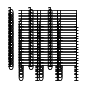

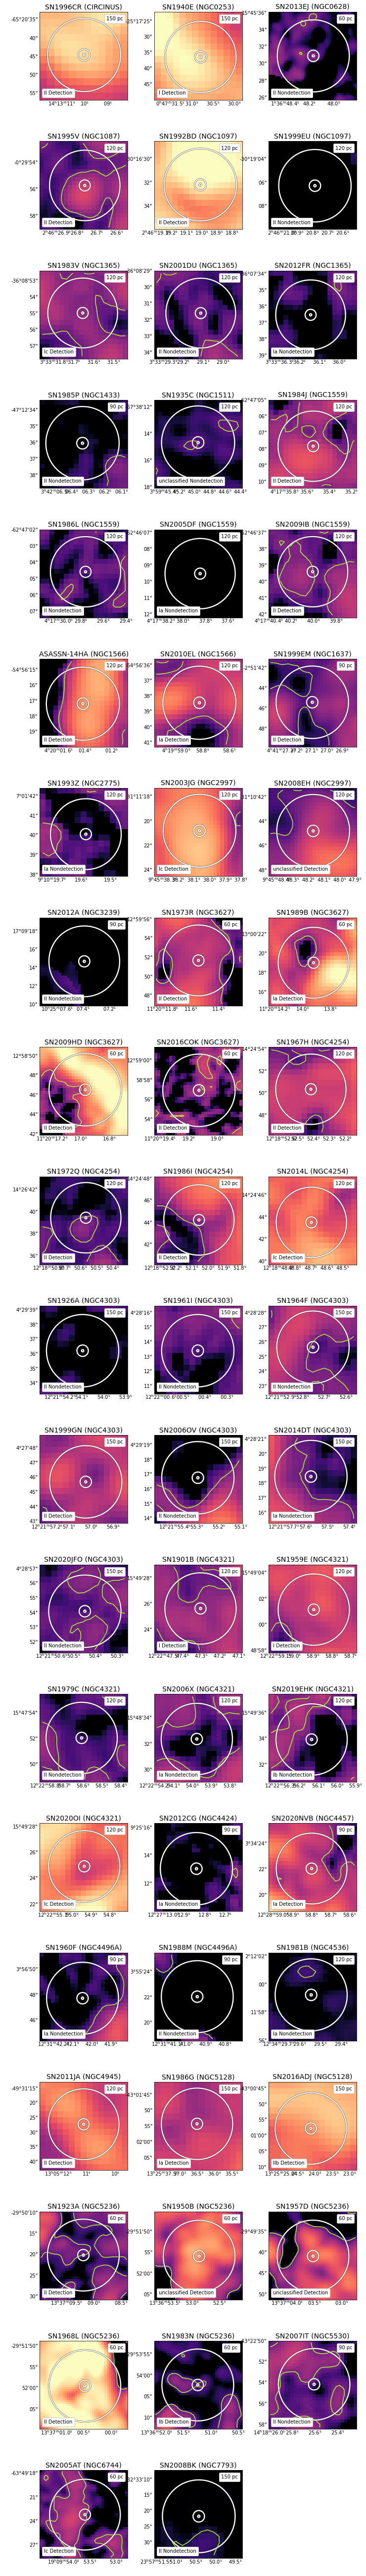

In [24]:
from astropy.coordinates import SkyCoord, Angle
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import astropy.units as u
from astropy.visualization.wcsaxes import SphericalCircle
from matplotlib.patches import Circle
import math

markerShapes = ["o", "s", "p", "D", "X", "H", "v"]
markerSizes  = [210,150,310,150,330,310,350]
markerEdges  = [410,350,610,350,630,610,650]

current_cmap = plt.get_cmap("magma")
current_cmap.set_bad("black")

numSNe= 59
# halfBox = 0.00416667 # 15'' in degrees


m,n,p =0,0,0 # plot counters for total number, rows, columns
PLOTS_PER_ROW = 3

fig2, axs = plt.subplots(math.ceil(numSNe/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(1, 1))
fig = plt.figure(figsize = (10,90))

for j in range(len(SNgals)): # counter to count galaxy maps
    leglab= SNtypes[j] + " " + isDetection[j]
    #set up data to use astropy's cutout2D to plot subsections of galaxy map
    data = plots[j]
    logData = np.log10(data)    
    sigData = sigma[j]
    wcs=wcss[j]

    halfBox = angSizes[j][3]/2. # 300 pc in decimal degrees
    #cutout2D needs skycoord position to carry units
    ra, dec = Angle(SNras[j] * u.degree), Angle(SNdecs[j] * u.degree)
    raRad, decRad  = ra.radian * u.rad, dec.radian * u.rad    
    position = SkyCoord(raRad, decRad) #position is center, use ra & dec of SN location
    #size = u.Quantity((20,20), u.arcsec) #size is size of box in arcsec 
    size = u.Quantity((angSizes[j][3],angSizes[j][3]), u.degree) #size is size of box in arcsec 
    # make 2D cutout, will assign a new wcs to cutout to keep track of coords
    cutout = Cutout2D(logData, position, size, wcs) 
    # use this new wcs when converting to pixels to add additional details to plot
    xval, yval = cutout.wcs.wcs_world2pix(ra,dec, 0)
    # get S-N-R data for contours
    sigCutout = Cutout2D(sigData, position, size, wcs)

    titleStr = SNnames[j].upper() + " (" + SNgals[j].upper() + ")"
    # make plot
    axs[m][n] = fig.add_subplot(20,3,p+1,projection = cutout.wcs)
    axs[m][n].set_title(titleStr, fontsize=14)            
    axs[m][n].imshow(cutout.data, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest", vmin = -0.5, vmax = 2.5, zorder = 0)
    axs[m][n].scatter(xval, yval, color = "black", marker ="", s = 60, zorder=2)
    axs[m][n].scatter(xval, yval, color = "white", marker = "", s = 80, edgecolor="black",zorder = 2, label=leglab)
    axs[m][n].set_ylabel(" ")
    axs[m][n].set_xlabel(" ")
    axs[m][n].tick_params(axis = "both", direction = "in", length = 0)
    axs[m][n].contour(sigCutout.data, [3], colors = ["greenyellow"], linestyles = ("-"), zorder = 1)

    #get spheres of influence
    spheres = angSizes[j][:-1]
    c50a = SphericalCircle((ra,dec), spheres[0] * u.degree, ec = "black", fill = False, lw=3.1,transform=axs[m][n].get_transform('world'))
    c50b = SphericalCircle((ra,dec), spheres[0] * u.degree, ec = "white", fill = False,lw=2.4,transform=axs[m][n].get_transform('world'))
    c100a = SphericalCircle((ra,dec), spheres[1] * u.degree, ec = "black", fill = False,lw=3.1,transform=axs[m][n].get_transform('world'))
    c100b = SphericalCircle((ra,dec), spheres[1] * u.degree, ec = "white", fill = False, lw=2.4,transform=axs[m][n].get_transform('world'))
    c200a = SphericalCircle((ra,dec), spheres[2] * u.degree, ec = "black", fill = False, lw=3.1,transform=axs[m][n].get_transform('world'))
    c200b = SphericalCircle((ra,dec), spheres[2] * u.degree, ec = "white", fill = False, lw=2.4,transform=axs[m][n].get_transform('world'))
    c = [c50a, c50b, c100a,c100b,c200a,c200b]
    for q in range(len(c)):
        axs[m][n].add_patch(c[q])

    #get Pixel distance for scalebar
    pixDists=[]
    for i in range(len(spheres)-1):
        sphereEdgeRa, sphereEdgeDec = ra + Angle(spheres[i]*u.degree), dec + Angle(spheres[i]*u.degree)
        sphereEdgex, sphereEdgey = cutout.wcs.wcs_world2pix(sphereEdgeRa, sphereEdgeDec, 0)
        pixDistx, pixDisty = sphereEdgex-xval, sphereEdgey-yval
        pixDists.append(np.sqrt((pixDistx**2 + pixDisty**2)/2))

    lowerleftra  = ra.value + halfBox 
    lowerleftdec = dec.value - halfBox + halfBox*0.1
    val=spheres[1]

    xArr, yArr = np.linspace(lowerleftra, lowerleftra-val, 100),np.linspace(lowerleftdec, lowerleftdec, 100)
    legStr = str(mapRes[j]) + " pc"
    resLeg = axs[m][n].legend([legStr],handlelength=0, handletextpad=0,loc="upper right", facecolor='white', framealpha=1.0)
    for item in resLeg.legendHandles:
        item.set_visible(False)
    axs[m][n].add_artist(resLeg)
    axs[m][n].legend(handlelength=0, handletextpad=0, loc="lower left", facecolor='white', framealpha=1.0)

    n+=1
    if n%PLOTS_PER_ROW==0:
        m+=1
        n=0
    p +=1

    plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.99, top = 0.9, wspace = 0.3, hspace = 0.2)
#plt.tight_layout(pad=0.5, w_pad=6.8, h_pad=1.0)
fig.savefig("../Figures/Zooms_60pc.pdf", dpi=300)
plt.show()


In [ ]:
print(isDetection)